In [1]:
from basic_tools import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7603)

# Parsing result of partitioned LDSC

In [3]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [4]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [5]:
idx=-1
h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/regression_result_list[idx]['category'].apply(category_to_format,args=('bp_range',))).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_df=h2_df.set_index(0)

found that variables 'gwas_result_sample','chr_bp_max' were not loaded. trying to load the variables
gwas_result_sample.shape: (13294674, 19)


In [50]:
def calculate_per_bp_var(regression_result_list_dict,suffix_list,mode='default'):
    var_list=[]
    for idx,value in enumerate(suffix_list):
        h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/regression_result_list[idx]['category'].apply(category_to_format,args=('bp_range',))).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        #h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/1).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        h2_df=h2_df.set_index(0)

        if mode=='default':
            values=h2_df.var(axis=1)
        elif mode=='mono':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            values=h2_df.var(axis=1)/h2_mono.var()
        elif mode=='max_and_poly':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            h2_poly=pd.Series(1.0,index=np.arange(h2_df.shape[1]));h2_poly=h2_poly/list(regression_result_bp_list_dict.values())[0][idx]['category'].apply(category_to_format,args=('bp_range',)).sum()
            #var_list.append(1-(h2_df.var(axis=1)-h2_poly.var())/(h2_df.var(axis=1).max()-h2_poly.var()))#-h2_df.mean(axis=1))
            values=(h2_df.var(axis=1)-0)/(h2_df.var(axis=1).max()-0)
        elif mode=='test':
            values=-np.log10(h2_df.var(axis=1))
            8.580318	
            values=(values.max()-values)
            values=1-values/values.max()
            #values=values-values.min()
            #values=1-(values-values.min())/(values.max()-values.min())
        else:
            raise
        var_list.append(values)
    var_df=pd.DataFrame(var_list,index=suffix_list)
    return var_df.T
per_bp_var=calculate_per_bp_var(regression_result_bp_list_dict,suffix_bp_list_power,mode='test')
per_bp_var.sort_values('bp8',ascending=False).head()

,bp300,bp128,bp64,bp32,bp16,bp8
0,,,,,,
6138_1,1.000000,0.917994,1.000000,1.000000,1.000000,1.000000
23115_irnt,0.885834,0.775041,0.860754,0.906893,0.971349,0.986191
2139_irnt,0.939661,0.769075,0.862561,0.891153,0.990408,0.976807
23104_irnt,0.839558,0.812932,0.897362,0.912716,0.982323,0.973433
23119_irnt,0.839601,0.770144,0.863750,0.903218,0.970287,0.972381


In [51]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [52]:
per_bp_var=per_bp_var.sort_values('bp8')

In [53]:
#per_bp_var

In [54]:
len_group=5
index_select=[value for idx,value in enumerate(per_bp_var.index) if idx%50<len_group]

In [55]:
pca_data=per_bp_var
pca = PCA(n_components=3)
pca_result=pca.fit_transform(pca_data)
pca_result = pd.DataFrame(pca_result,index=pca_data.index)

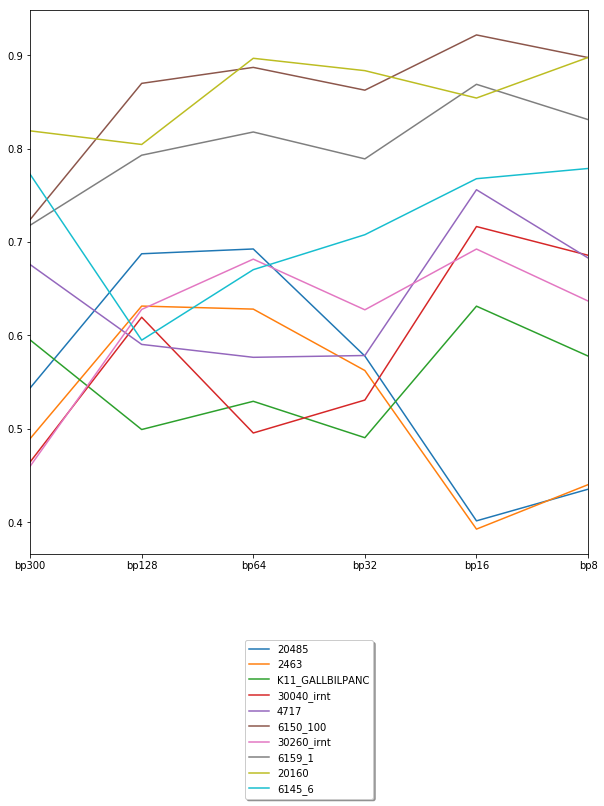

In [60]:
per_bp_var.loc[index_select].sample(10).T.plot()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)

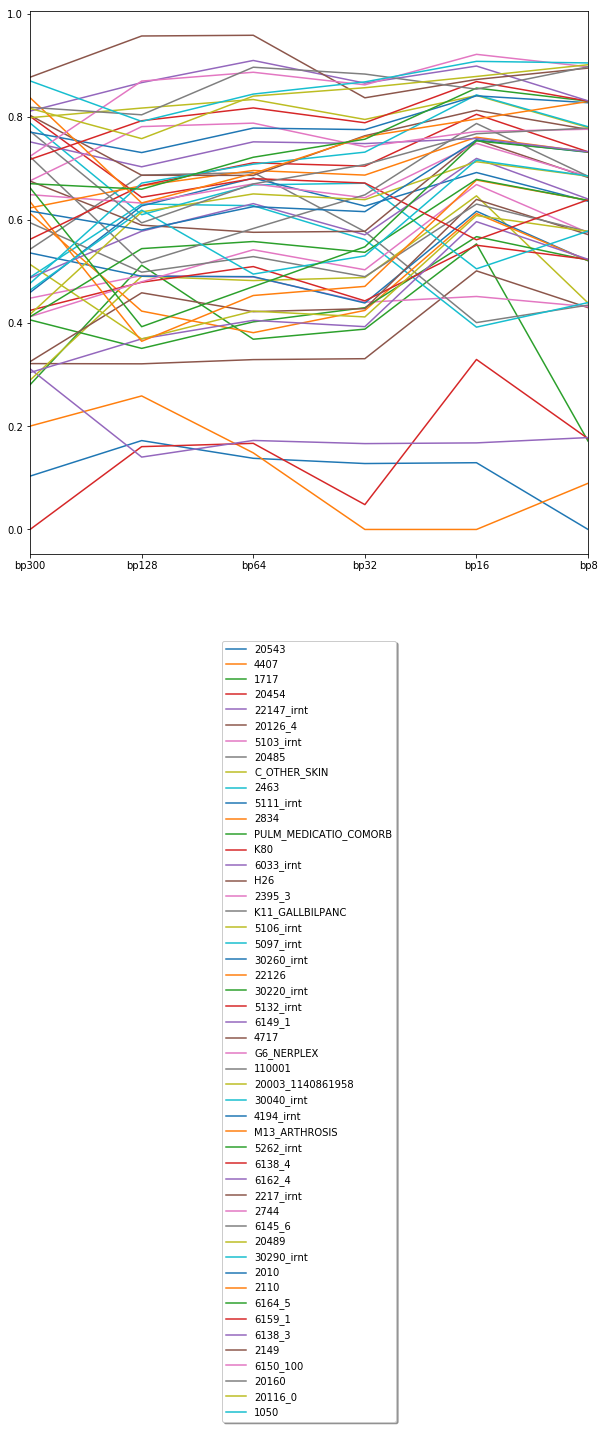

In [57]:
per_bp_var.loc[index_select].T.plot()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)

In [49]:
pca.explained_variance_ratio_

array([0.90709329, 0.08489182, 0.00738495])

In [41]:
pca.components_

array([[-0.37664246, -0.40437961, -0.43839392, -0.45118946, -0.36459587,
        -0.4073405 ],
       [ 0.3735943 ,  0.32180155,  0.2476971 ,  0.12434515, -0.68999366,
        -0.45162401],
       [ 0.80522385, -0.49419617, -0.28810467, -0.07283849, -0.00144519,
         0.13810452]])

In [18]:
pca.components_[0]*-0.5+pca.components_[1]*0

array([0.18832123, 0.20218981, 0.21919696, 0.22559473, 0.18229793,
       0.20367025])

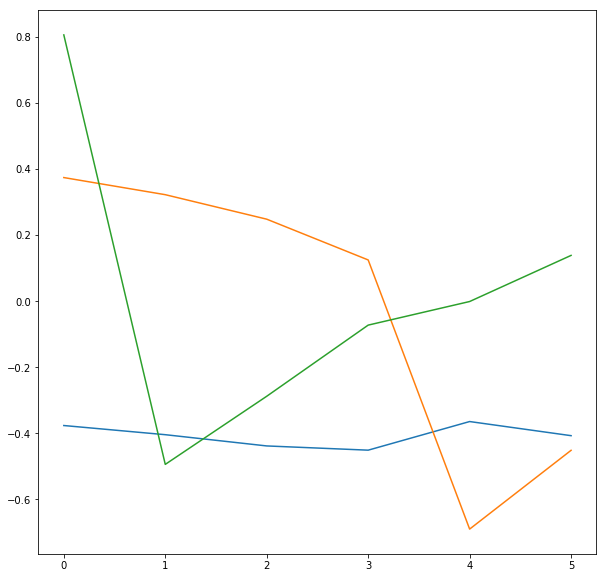

In [34]:
plt.plot(pd.DataFrame(pca.components_).T)

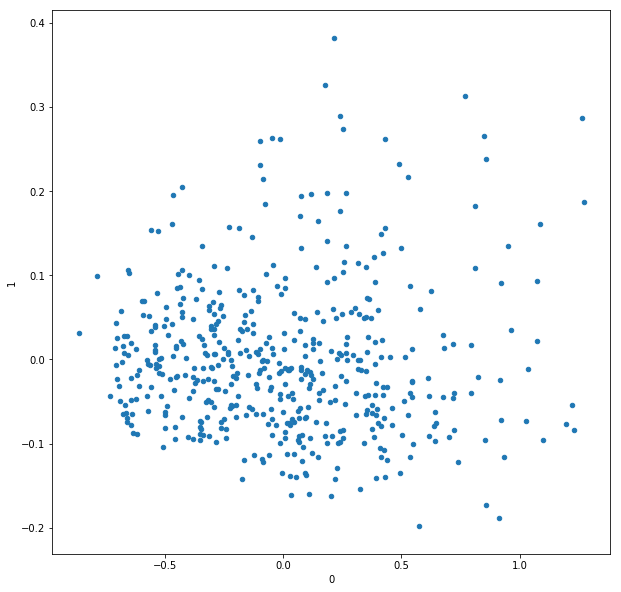

In [35]:
plt.rcParams["figure.figsize"] = (10,10)
pca_result.plot.scatter(x=0,y=1)

#plt.xlim(-5,5)
#plt.ylim(-3,3)

In [456]:
#anova_plot_data.T

In [451]:
tsne_data=pca_result

tsne = TSNE(learning_rate=100,perplexity=10)
#tsne = TSNE(learning_rate=200)
tsne_result = pd.DataFrame(tsne.fit_transform(tsne_data),index=tsne_data.index)

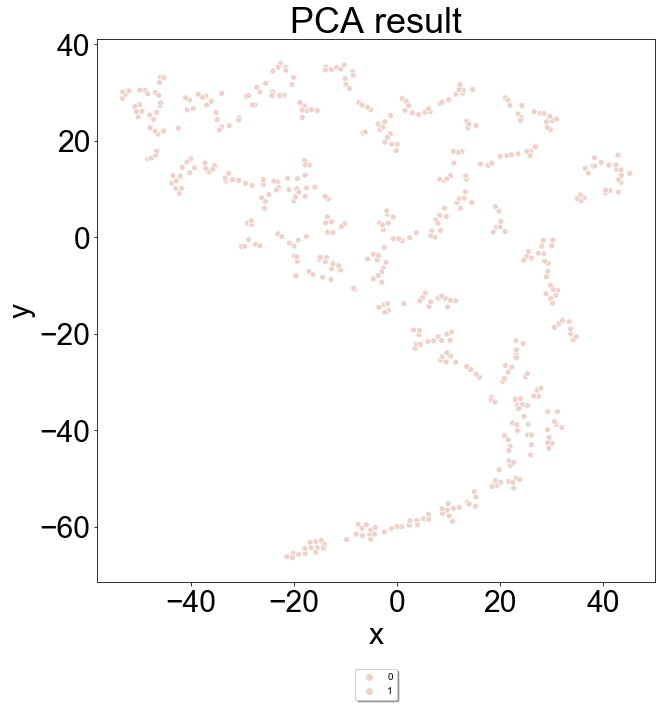

In [452]:
plot_data=tsne_result
x_data=plot_data[0]
y_data=plot_data[1]

#hue_data=[h2_total.loc[pheno_code]['uni.Total Liability scale h2'] for  pheno_code in pheno_code_list]
#hue_data=[corr_with_dummy_cm_dict['snp'].loc[pheno_code]['cm8'] for  pheno_code in toplot.index]
hue_data=1

plt.title("PCA result")
sns.scatterplot(x_data,y_data,hue=hue_data)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)


plt.show()

In [373]:
dbscan=DBSCAN(eps=3, min_samples=2)
dbscan_result=dbscan.fit(tsne_result)

In [374]:
plot_data=tsne_result.copy()
plot_data.columns=['x_data','y_data']
plot_data['label']=dbscan_result.labels_

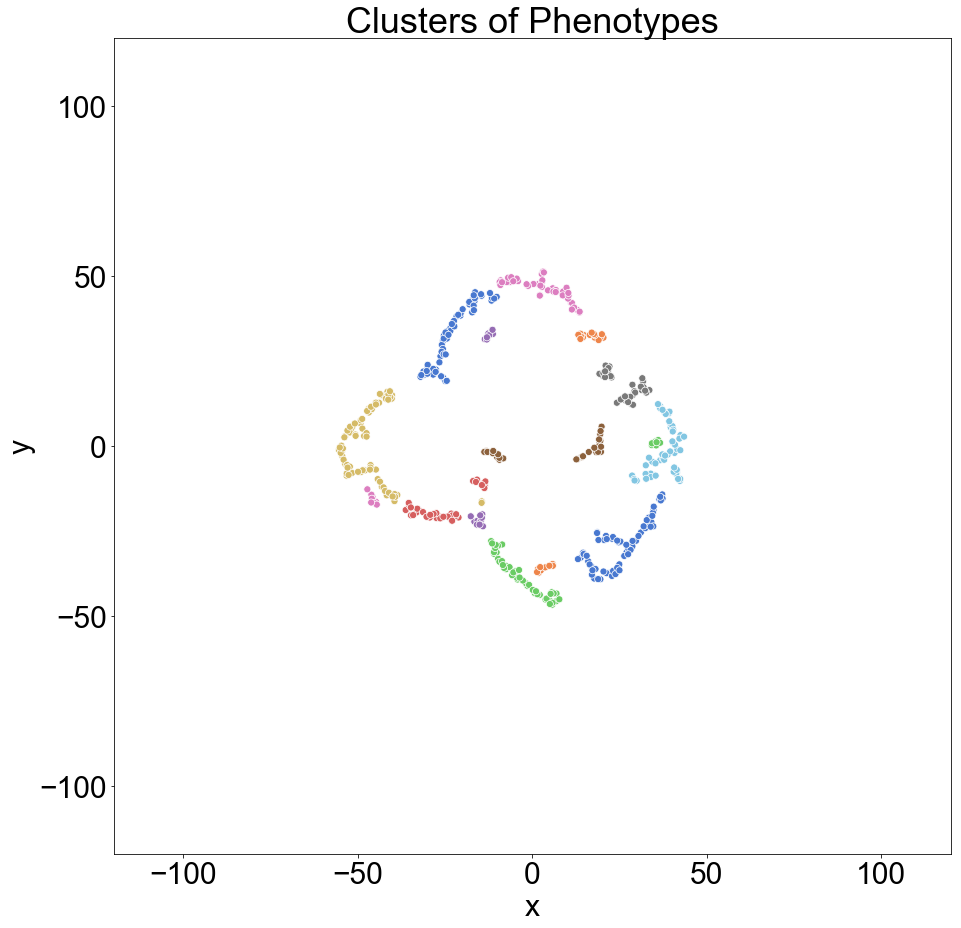

In [375]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (15,15)

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())

plt.title("Clusters of Phenotypes")
sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=50,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))))



"""
#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,40,10)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub'))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()].iloc[:2]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.4*(text_plotted['y']-xytext[1])**2)<1000).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,1), ec="black", lw=0.5))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break

"""



plt.xlabel("x")
plt.ylabel("y")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)

plt.xlim(-120,120)
plt.ylim(-120,120)


plt.show()

# VVs

In [79]:
h2_total.loc['I83']['bp300.Total Liability scale h2']/h2_total.loc['I83']['bp300.Total Observed scale h2']

7.299435028248588

In [80]:
h2_total.loc['I83']['bp8.Total Liability scale h2']/h2_total.loc['I83']['bp8.Total Observed scale h2']

7.30952380952381

In [87]:
#regression_result_bp_list_dict['I83'][-1].sort_values('h2',ascending=False)

In [83]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)
h2_bp8_df.columns=regression_result_bp_list_dict['23115_irnt'][-1]['category'].apply(category_to_format,args=('chr_bp',))
#h2_bp8_df.columns=regression_result_bp_list_dict['23115_irnt'][-1]['category'].apply(category_to_format,args=('padding',))

In [89]:
a=h2_bp8_df.loc['I83'].sort_values(ascending=False)*h2_total.loc['I83']['bp8.Total Liability scale h2']/h2_total.loc['I83']['bp8.Total Observed scale h2']

In [92]:
a.iloc[:15]

category
Chr16 88-90     0.264497
Chr9 112-120    0.202149
Chr1 8-16       0.162763
Chr2 64-72      0.131300
Chr17 0-8       0.127052
Chr5 120-128    0.125352
Chr8 8-16       0.106485
Chr4 0-8        0.103365
Chr20 0-8       0.101712
Chr17 64-72     0.100202
Chr6 136-144    0.096249
Chr16 24-32     0.095672
Chr16 80-88     0.092548
Chr11 8-16      0.092405
Chr19 32-40     0.090448
Name: I83, dtype: float64

# Dictionary munge

In [76]:
phenotypes_par_filtered_description_dict=pd.read_csv(phenotypes_par_filtered_description_dict_path,sep='\t',index_col='description')
pleiotropic_loci_description_dict=pd.read_csv(pleiotropic_loci_description_dict_path,sep='\t',index_col='description',converters={'description_pub':lambda x:x.replace('\\n','\n')})
correlation_description_dict=pd.read_csv(correlation_description_dict_path,sep='\t',index_col='description',converters={'description_pub':lambda x:x.replace('\\n','\n')})

In [77]:
phenotypes_par_filtered_description_dict.columns=phenotypes_par_filtered_description_dict.columns+"_basic"
pleiotropic_loci_description_dict.columns=pleiotropic_loci_description_dict.columns+"_pleiotropic"
correlation_description_dict.columns=correlation_description_dict.columns+"_correlation"

In [79]:
description_dict_merge=phenotypes_par_filtered_description_dict.merge(pleiotropic_loci_description_dict,how='outer',left_index=True,right_index=True).merge(correlation_description_dict,how='outer',left_index=True,right_index=True)

In [85]:
description_dict_merge.columns

Index(['description_pub_basic', 'description_abbr_basic',
       'description_pub_pleiotropic', 'description_abbr_pleiotropic',
       'description_pub_correlation', 'description_abbr_correlation'],
      dtype='object')

In [2]:
#description_dict_merge.to_csv(base_path+"description_dict_merge.tsv",sep='\t')

In [ ]:
for idx,row in description_dict_merge.iterrows():
    if np.logical_and.reduce(row.isna().values):
        continue
    print(row)

In [15]:
pleiotropic_loci_description_dict.index.

Type:        Index
String form:
Index(['Why stopped smoking: Health precaution',
           'Weight change during worst episode of de <...>  angle (left)',
           '3mm cylindrical power (left)'],
           dtype='object', name='description')
Length:      62
File:        ~/tools/miniconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py
Docstring:  
Immutable ndarray implementing an ordered, sliceable set. The basic object
storing axis labels for all pandas objects.

Parameters
----------
data : array-like (1-dimensional)
dtype : NumPy dtype (default: object)
    If dtype is None, we find the dtype that best fits the data.
    If an actual dtype is provided, we coerce to that dtype if it's safe.
    Otherwise, an error will be raised.
copy : bool
    Make a copy of input ndarray
name : object
    Name to be stored in the index
tupleize_cols : bool (default: True)
    When True, attempt to create a MultiIndex if possible

See Also
---------
RangeIndex : Index implementing a 

In [2]:
description_dict_merge

,description_pub,description_abbr
description,,
Time spent watching television (TV),Time watching TV,NaN
Current tobacco smoking,Tobacco current,NaN
Past tobacco smoking,Tobacco past,NaN
Number of treatments/medications taken,Number of treatments taken,NaN
Alcohol intake frequency.,Alcohol intake,NaN
Alcohol usually taken with meals,Alcohol intake with meals,NaN
Comparative body size at age 10,Comparative body size\nat age 10,NaN
Comparative height size at age 10,Comparative height size\nat age 10,NaN
Mood swings,Mood swings,NaN


In [2]:
description_dict_merge.head()

,description_pub_basic,description_abbr_basic,description_pub_pleiotropic,description_abbr_pleiotropic,description_pub_correlation,description_abbr_correlation
description,,,,,,
#Arthrosis,NaN,NaN,NaN,NaN,NaN,NaN
#Other joint disorders,NaN,NaN,NaN,NaN,NaN,NaN
3mm asymmetry angle (left),NaN,NaN,NaN,NaN,NaN,NaN
3mm asymmetry angle (right),NaN,NaN,NaN,NaN,NaN,NaN
3mm cylindrical power (left),NaN,NaN,3mm CP(left),NaN,NaN,NaN


In [4]:
description_to_short("3mm cylindrical power (left)","pub","pleiotropic")

'3mm CP(left)'